# El-Nino Southern Oscillation 3.4

In this notebook, I used the El-Nino Southern Oscillation 3.4 SST Anomaly from https://psl.noaa.gov/data/timeseries/monthly/NINO34/ to compare to the melting layer time series.

#### Import modules

In [1]:
%pylab inline

import pyart
import pandas as pd
import numpy as np
import seaborn as sns

import os

import datetime as dt
import pytz
https://psl.noaa.gov/data/timeseries/monthly/NINO34/
import sys, os

Populating the interactive namespace from numpy and matplotlib

## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/wradlib/io/radolan.py:835: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'RR': {'add_offset': np.float(0),
/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/wradlib/io/radolan.py:842: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'RA': {'add_offset': np.float(0),


#### Load data

I downloaded the data [here](https://psl.noaa.gov/data/correlation/nina34.data) _(Last accessed: 04/27/2021)_ and saved it to my local directory. There is probably a way to read the data directly from the site into a pandas dataframe, but this is how I did it for now.

In [36]:
# file path
datfile = '/home/icrisologo/Data/nina34.data'

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


After investigating the data, I noticed a couple of things. First is that -99.99 are used for the missing values. Second, it is neither tab-separated, fixed-width, nor comma-separated. Instead, the values are separated by two spaces, except when there are missing values.

The first two lines of data (years 1948 and 1949) both have missing values anyway, so I skipped reading that. Now, I can simply read the data file using `pd.read_csv`, and just specify the two spaces as the separator. I also skipped reading the first row because it just says the start and end years. I set the index to the 0th column so that the index is the year.

I also dropped the last 4 rows because they just contain other info.

In [41]:
df = pd.read_csv (datfile,sep='  ',skiprows=(3),header=None,index_col=[0])
df.drop(df.tail(4).index,inplace=True) # drop last 4 rows (other info)

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [42]:
df

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1950,24.55,25.06,25.87,26.28,26.18,26.46,26.29,25.88,25.74,25.69,25.47,25.29
1951,25.24,25.71,26.90,27.58,27.92,27.73,27.60,27.02,27.23,27.20,27.25,26.91
1952,26.67,26.74,27.17,27.80,27.79,27.18,26.53,26.30,26.36,26.26,25.92,26.21
1953,26.74,27.00,27.57,28.04,28.28,28.12,27.43,26.94,27.01,26.87,26.88,27.00
1954,26.98,27.03,26.90,26.64,27.12,26.80,26.11,25.43,25.12,25.23,25.57,25.26
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,29.11,29.01,28.90,28.72,28.23,27.69,26.82,26.28,26.14,25.98,25.94,26.10
2017,26.12,26.67,27.32,28.03,28.30,28.06,27.54,26.70,26.29,26.15,25.74,25.62
2018,25.57,25.97,26.48,27.31,27.73,27.77,27.42,26.94,27.19,27.62,27.61,27.49


I want the index to have only the year, so that I can filter by year. First, the index column name is renamed to `Year`, then it is converted to a datetime object, which gets the format "Year-month-day". Since I want only the year, I select only the year object.

In [43]:
df.index = df.index.rename('Year')
# Converting the index as date
df.index = pd.to_datetime(df.index, format='%Y-%m-%d').year

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now I can select only years from 1996 onwards.

In [44]:
df = df.loc[df.index>1995]

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For easier filtering, I also renamed the columns as the month number in string format.

In [45]:
df.columns = ['1', '2','3','4','5','6','7','8','9','10','11','12']

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Re-arranging by California wet season

Because the wet season of California is from October 1 to April 1 of the following year, it would be helpful to rearrange the dataframe such that each row is one wet season. The wet season is designated by the calendar year in which it ends, so that October 1995 to March 1996 is the 1996 wet season.

In [46]:
df_wateryear = pd.DataFrame()#(columns=[10,11,12,1,2,3])
for y in df.index:
    wateryear_half1 = df.loc[(df.index==y)][['10','11','12']]
    wateryear_half2 = df.loc[(df.index==y+1)][['1', '2','3','4','5','6','7','8','9']]
    wateryear_half2.rename(index={y+1:y},inplace=True)
    wateryear = pd.merge(wateryear_half1,wateryear_half2,how='outer',on='Year')
    df_wateryear = pd.concat([df_wateryear,wateryear])

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Let's have a preview.

In [47]:
df_wateryear.head()

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,10,11,12,1,2,3,4,5,6,7,8,9
Year,,,,,,,,,,,,
1996,26.27,26.29,25.95,26.01,26.38,27.04,27.98,28.58,28.82,28.86,28.75,28.85
1997,29.08,29.12,28.89,28.93,28.78,28.62,28.60,28.51,27.34,26.30,25.57,25.46
1998,25.25,25.24,24.91,24.86,25.43,26.33,26.70,26.79,26.53,26.13,25.63,25.63
1999,25.48,25.12,24.86,24.78,25.21,26.30,26.95,27.07,26.94,26.63,26.37,26.20
2000,26.02,25.92,25.68,25.81,26.12,26.80,27.33,27.60,27.54,27.25,26.80,26.52


In [48]:
df_wateryear['Year'] = df_wateryear.index

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
df_wateryear.head()

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,10,11,12,1,2,3,4,5,6,7,8,9,Year
Year,,,,,,,,,,,,,
1996,26.27,26.29,25.95,26.01,26.38,27.04,27.98,28.58,28.82,28.86,28.75,28.85,1996
1997,29.08,29.12,28.89,28.93,28.78,28.62,28.60,28.51,27.34,26.30,25.57,25.46,1997
1998,25.25,25.24,24.91,24.86,25.43,26.33,26.70,26.79,26.53,26.13,25.63,25.63,1998
1999,25.48,25.12,24.86,24.78,25.21,26.30,26.95,27.07,26.94,26.63,26.37,26.20,1999
2000,26.02,25.92,25.68,25.81,26.12,26.80,27.33,27.60,27.54,27.25,26.80,26.52,2000


#### Trend over the years

Just

In [51]:
df_ = df_wateryear.melt(id_vars='Year', var_name='Month', value_name='ENSO3.4_anomaly')

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df_['Month'] = df_['Month'].astype(float)
df_['ENSO3.4_anomaly'] = df_['ENSO3.4_anomaly'].astype(float)

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


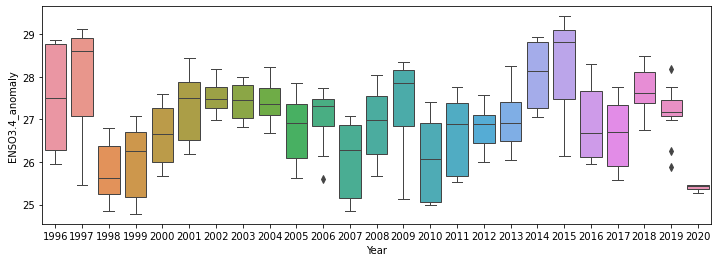

In [53]:
fig, ax = pyplot.subplots(figsize =(12, 4)) 
ax = sns.boxplot(x="Year", y="ENSO3.4_anomaly", 
                 data=df_, linewidth=1)

#### Export dataframe

Save the dataframe as a csv file so it can be plotted with other dataframes in a different notebook.

In [54]:
df_.to_csv("enso34_anomaly.csv")

/home/icrisologo/.conda/envs/pyart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
